In [3]:
import deepxde as dde
import numpy as np


def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    # Most backends
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    # Backend jax
    # y_val, y_fn = y
    # y1, y2 = y_val[:, 0:1], y_val[:, 1:]
    # dy1_x, _ = dde.grad.jacobian(y, x, i=0)
    # dy2_x, _ = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

Compiling model...
Building feed-forward neural network...
'build' took 0.078588 s

'compile' took 0.584621 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [5.02e-01, 2.31e-02, 0.00e+00, 1.00e+00]    [5.14e-01, 1.89e-02, 0.00e+00, 1.00e+00]    [1.31e+00]    
1000      [8.49e-03, 7.27e-03, 4.15e-08, 3.20e-04]    [9.36e-03, 6.76e-03, 4.15e-08, 3.20e-04]    [7.73e-01]    
2000      [4.15e-03, 3.51e-03, 1.51e-06, 7.87e-05]    [4.64e-03, 3.43e-03, 1.51e-06, 7.87e-05]    [5.14e-01]    
3000      [1.51e-03, 2.10e-03, 4.15e-08, 3.20e-05]    [1.81e-03, 1.90e-03, 4.15e-08, 3.20e-05]    [3.19e-01]    
4000      [2.78e-04, 3.25e-04, 1.13e-06, 2.42e-06]    [3.18e-04, 2.42e-04, 1.13e-06, 2.42e-06]    [1.04e-01]    
5000      [1.41e-04, 1.27e-04, 2.55e-07, 3.99e-07]    [1.40e-04, 1.08e-04, 2.55e-07, 3.99e-07]    [5.43e-02]    
6000      [8.14e-05, 6.81e-05, 5.86e-07, 1.45e-07]   

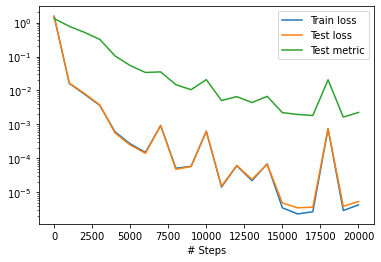

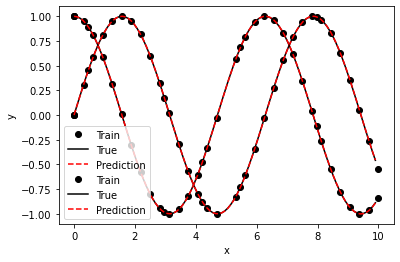

On AORUS 7 SA, GPU : NVIDIA GeForce GTX 1660 Ti


In [6]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)
print("On AORUS 7 SA, GPU : NVIDIA GeForce GTX 1660 Ti")